## Esma 3016, lab2
## Edgar Acuna
### Febrero 26, 2018

Organizacion y presentacion de datos cuantitativos discretos.
Usaremos el modulo pandas, que se usa para hacer analisis estadistico basico y los modulos 
matplotlib y seaborn que se usan para hacer graficas

In [18]:
import pandas as pd
import seaborn as sns

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
#Leyendo datos de la internet, las columnas tienen nombres
datos=pd.read_csv("http://academic.uprm.edu/eacuna/clase97.txt",sep=" ")
#Viendo las seis primera fila de la tabla de datos
datos.head(10)

,edad,sexo,escuela,programa,creditos,gpa,familia,hestud,htv
0,21,f,publ,biol,119,3.60,3,35,10
1,18,f,priv,mbio,15,3.60,3,30,10
2,19,f,priv,biot,73,3.61,5,5,7
3,20,f,priv,mbio,*,2.38,3,14,3
4,21,m,publ,pmed,114,3.15,2,25,25
5,20,m,publ,mbio,93,3.17,3,17,6
6,22,m,publ,pmed,120,2.15,5,20,10
7,20,m,priv,pmed,*,3.86,5,15,5
8,20,m,priv,pmed,94,3.19,4,10,2
9,20,f,publ,pmed,130,3.66,6,20,33


In [21]:
# Informacion acerca de la base de datos
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 9 columns):
edad        28 non-null int64
sexo        28 non-null object
escuela     28 non-null object
programa    28 non-null object
creditos    28 non-null object
gpa         28 non-null float64
familia     28 non-null int64
hestud      28 non-null int64
htv         28 non-null int64
dtypes: float64(1), int64(4), object(4)
memory usage: 2.0+ KB


In [22]:
#Haciendo una funcion que haga la tabla completa de distribucion de frecuencias
def tablafreq(datos,str):
    """
    :param datos: Es el nombre de la base de datos
    :param str: Es el nombre de la variable a usar de la base de datos.
    """
    import pandas as pd
    tab1=pd.crosstab(index=datos[str],columns="counts",colnames=['variable'])
    tab1['frec.relat.porc']=tab1*100/tab1.sum()
    tab1['frec.acum']=tab1.counts.cumsum()
    tab1['frec.relat.porc.acum']=tab1['frec.acum']*100/tab1['counts'].sum()
    return tab1;

In [23]:
help(tablafreq)

Help on function tablafreq in module __main__:

tablafreq(datos, str)
    :param datos: Es el nombre de la base de datos
    :param str: Es el nombre de la variable a usar de la base de datos.



In [24]:
tablafreq(datos,"familia")

variable,counts,frec.relat.porc,frec.acum,frec.relat.porc.acum
familia,,,,
1,1,3.571429,1,3.571429
2,3,10.714286,4,14.285714
3,9,32.142857,13,46.428571
4,6,21.428571,19,67.857143
5,8,28.571429,27,96.428571
6,1,3.571429,28,100.000000


In [25]:
#Haciendo la grafica de Linea correspondiente a la tabla de frecuencias
plt.style.use('ggplot')

In [27]:
# Hallando las frecuencias absolutas de la variable edad
tablaf = pd.crosstab(index=datos["edad"],columns="counts")
tablaf

col_0,counts
edad,
18,1
19,1
20,12
21,9
22,4
23,1


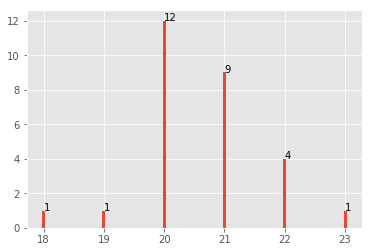

In [28]:
 with plt.style.context('ggplot'):
    # plot command goes here
    plt.bar(tablaf.index[0:6],tablaf.loc[tablaf.index[0:6]]['counts'],width=.05)
    for a,b in zip(tablaf.index[0:6],tablaf.loc[tablaf.index[0:6]]['counts']):
        plt.text(a,b,b) 
    plt.show()